# Supercharge your scientific Python computations by learning how to use the NumPy library efficiently
## Ivan Idris

In [1]:
# Import all the necessary libraries, just what is needed, nothing more, nothing less

import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

### Loading and proprocessing data

Lets analize some cliamte data using NumPy. The data used in this analysis is downloaded form Kaggle, the link to the data set is provided below. Notice that NumPy can read CSV data using the __np.loadtxt__ function. However, handling date with Numpy is much cumbersome as compared to handling data with Pandas. 

#### Understanding the data set
The data set contains the year and month of recording data, average monthly temperature, uncertaintty in recorded temperature, city and country, and latitue and longitude of the city. The recording started from end of the 18th century. Data is recored monthly.

In [2]:
# Let's set the path of the file to be loaded
pathWeatherData = "../Documents/coding/greatLearnings/resources/data/archive/GlobalLandTemperaturesByCity.csv"

# Here, data is loaded into arrays with relevant names instead of a single matrix
(dateWeather
 , dailyTempWeather
 , countryWeather
 , cityWeather) = np.loadtxt(pathWeatherData
                            # Only columns coresponding to data are loaded, location cordinates are ignored
                            , usecols=(0, 1, 2, 3)
                            # Specify the datatype of the arrays, the default is flaot64
                            # datetime format is tricky!
                            # This is a custom datatype
                            , dtype=np.dtype([("date", "datetime64[s]")
                                              , ("avgTemp", np.float64)
                                              , ("city", str, 25)
                                              , ("country", str, 25)])
                            # Skip the headers
                            , skiprows=1
                            # Specify the delimiter
                            , delimiter=","
                            # This means that data is to loaded into maay arrays instead of a single matrix
                            , unpack=True
                            # Preprocess the data on reading
                            # Bytes are decoded t "utf-8" format to convert them to string
                            , converters={0 : lambda x : x.decode("utf-8") or np.nan
                                          # Temperature data is read as flaot to be careful
                                          , 1 : lambda x : np.float64(x.strip() or np.nan)})

### Understanding the data
Let's understand some aggregate statistics

In [3]:
# Maximum and minimum temperature in the data
"Maximum temperature is {:.2f}, and minimum temperature is {:.2f}".format(np.nanmax(dailyTempWeather)
                                                                          , np.nanmin(dailyTempWeather))

'Maximum temperature is 39.65, and minimum temperature is -42.70'

In [4]:
# Percentage of days when temperature was below frezing point 
"days when average temperature was below 0: {:.2f}%".format(len(dailyTempWeather[dailyTempWeather < 0])/len(dailyTempWeather)*100)

'days when average temperature was below 0: 7.11%'

In [5]:
# Invalid values, for example, np.nan or np.PINF or no.NINF, are maked before calculating aggregate statistics
maskedDailyAvgTemp = np.ma.array(dailyTempWeather, mask = np.isnan(dailyTempWeather))
"mean average temperature {:.2f}, and mean uncertainty in average temperature {:.2f}".format(maskedDailyAvgTemp.mean()
                                                                                             , maskedDailyAvgTemp.std())

'mean average temperature 16.73, and mean uncertainty in average temperature 10.35'

In [6]:
# Let's see if temperatues have gone up in the last half of the data, as compared to the first halpf of the data
# We can compare the average teperature for the bttom half of the data to that of the top halp
# But that is not correct!
"""average temperature for the first half of the data is {:.2f}
, and for the last half is {:.2f}""".format(maskedDailyAvgTemp[:len(dailyTempWeather)//2].mean()
                                            , maskedDailyAvgTemp[len(dailyTempWeather)//2:].mean())

'average temperature for the first half of the data is 17.18\n, and for the last half is 16.27'

In [7]:
# We can find the median of the dates of observations and comapre averrage temperature before and after the median date
# This is better, although not correct still
medianDateWeather = np.sort(dateWeather)[len(dateWeather)//2]
"""average temperature for the first half of the data is {:.2f}
, and for the last half is {:.2f}""".format(maskedDailyAvgTemp[np.where(dateWeather<medianDateWeather)].mean()
                                            , maskedDailyAvgTemp[np.where(dateWeather>=medianDateWeather)].mean())

'average temperature for the first half of the data is 15.47\n, and for the last half is 17.88'

This difference in average, although not reliable, is a good prima facie evidence for further research

### Begning to visualize the data
We start with very simple visualizations to understand the data and brain storm, and gradually move on to some complex insigntful visualizations.

At look at global and local pictures.

#### A local analysis

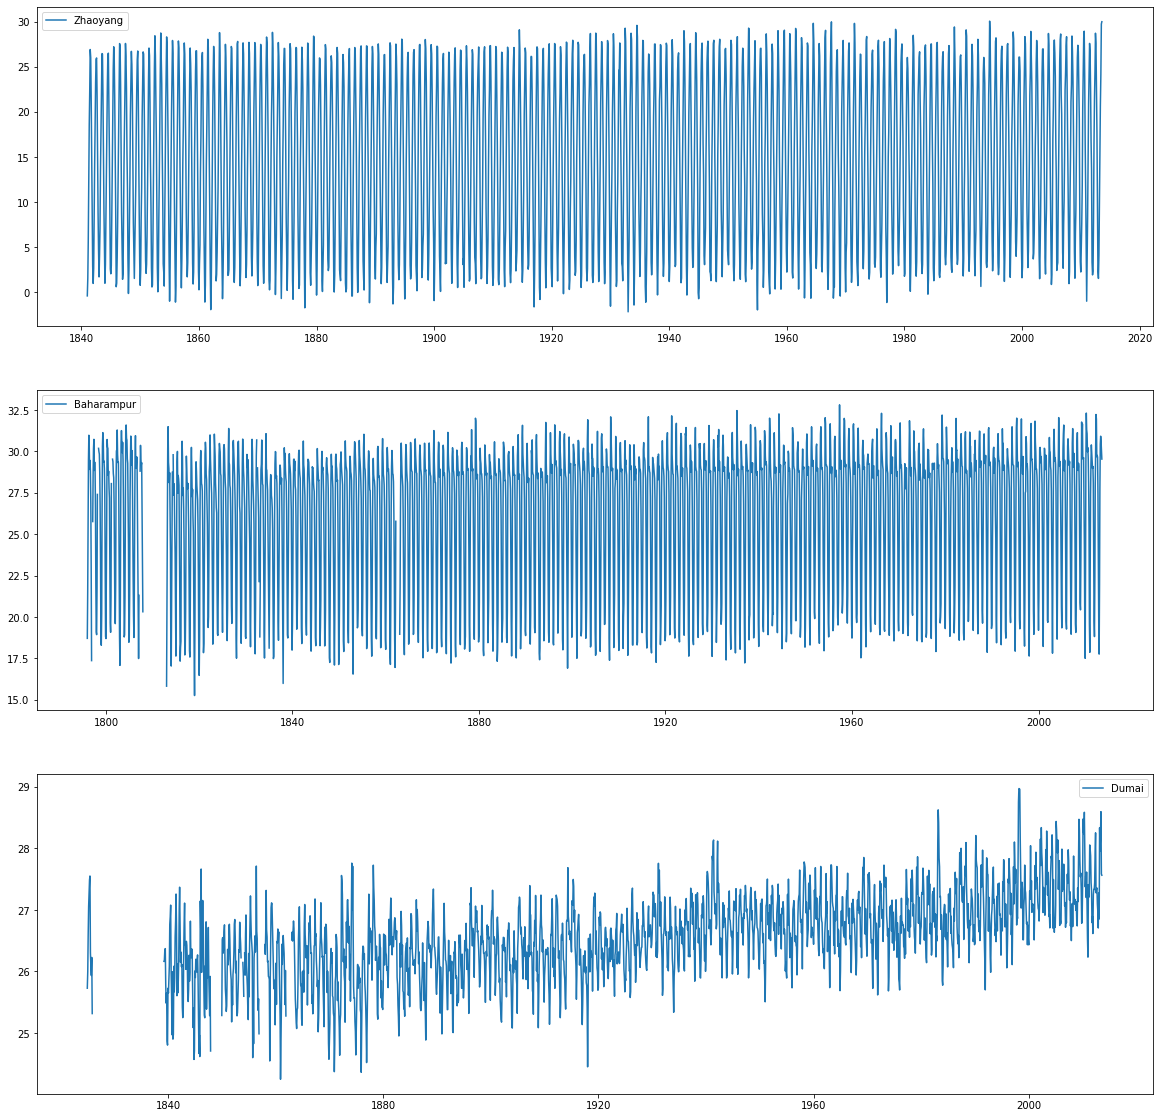

In [8]:
# Find the unique cities in the data
uniqueCitiesWeather = np.unique(cityWeather)

# Choose three cities at random for visualization
cities = uniqueCitiesWeather[np.random.randint(0,len(uniqueCitiesWeather),3)]

# Set the figure size to for confortably acoomodating the three sub plots
plt.figure(figsize=(20, 20))

# Loop through the cities 
for i, city in enumerate(cities):
    
    # Choose the subplot for the city
    plt.subplot(len(cities),1,i+1)
    
    # The NumPy where fucntion provides conditional indexing
    # Plot temperature against date
    plt.plot(dateWeather[np.where(cityWeather == city)]
             , dailyTempWeather[np.where(cityWeather == city)]
             , label=city)
    plt.legend()
    
plt.show()

# Delete the temporary vriables creted for plotting
del cities

#### Aggregrate analysis

Let's look at the tred of aggregate globaltemperature data

<ipython-input-9-0051563bfa73>:19: UserWarning: Warning: converting a masked element to nan.
  , np.array([maskedDailyAvgTemp[indicesYearlyWeather].mean()]))


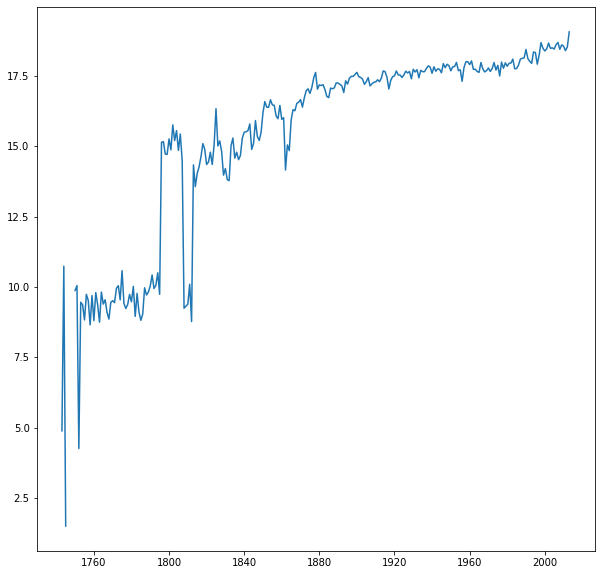

In [9]:
# Temporary array to store yearly average global temperatures 
yearlyAvgTempWeather = np.array([])

# Unique years on which data is collected
# The datea array msut be cast into just years before finding unique years
years = np.unique(np.unique(dateWeather).astype("datetime64[Y]"))

# Setting the figure size
plt.figure(figsize=(10, 10))

# For every year in years
for year in years:
    
    # Get the indices where year is the same
    indicesYearlyWeather = np.where(dateWeather.astype("datetime64[Y]") == year) #.astype("datetime64[Y]"))
    
    # Append the average temperature of that yaer in the yearl avegare temperature array
    yearlyAvgTempWeather = np.append(yearlyAvgTempWeather
                                     , np.array([maskedDailyAvgTemp[indicesYearlyWeather].mean()]))

# Mask invalid data
yearlyAvgTempWeather = np.ma.masked_invalid(yearlyAvgTempWeather)

# Plotting the data
plt.plot(years, yearlyAvgTempWeather)

# Show the graph
plt.show()

# Delete the temporary inidec created for plotting
del indicesYearlyWeather

#### Correlation statistics
The auto-correlation of the yearly average global temperature can give an interesting insight. Notice that the correlation coefficient remains moderate to high for a large range of lags. Further, it can be observed from the graph above that only the data collectd over the last 260 years is reliable.

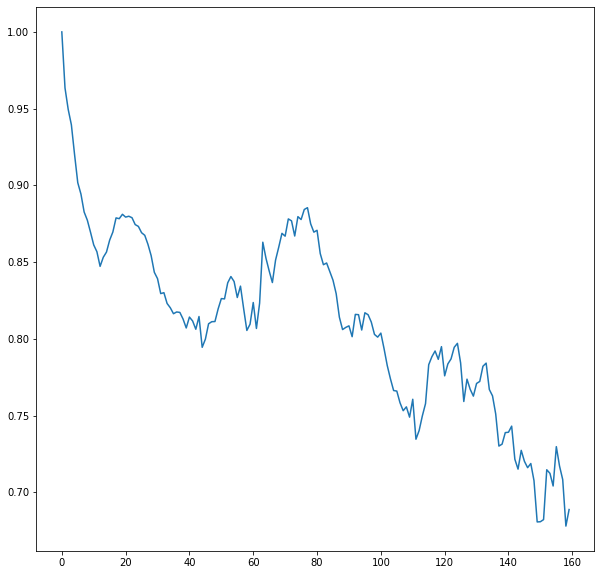

In [10]:
# Correlation at lag 0 is 1
corrYearlyAvgTempWeather= np.array([1])

# Set figure soze
plt.figure(figsize=(10, 10))

# Only the data in the last 200 years is reliable
for i in range(1,160):
    
    # Get the correlation coefficient at a specified lags
    # Notice that the avegares for the first 7 years contain nan vaules, so that part of the series is discarded
    value = np.corrcoef(yearlyAvgTempWeather[7:-i], yearlyAvgTempWeather[7+i:])[0,1]
    
    # Store in a NumPy array
    corrYearlyAvgTempWeather = np.append(corrYearlyAvgTempWeather, value)
    
# Plot the data
plt.plot(range(corrYearlyAvgTempWeather.shape[0]), corrYearlyAvgTempWeather)
plt.show()

A look at aggregrae analysis at local level

<ipython-input-39-9527e9b7748a>:21: UserWarning: Warning: converting a masked element to nan.
  , np.array([maskedDailyAvgTemp[indicesCity].mean()]))
<ipython-input-39-9527e9b7748a>:21: UserWarning: Warning: converting a masked element to nan.
  , np.array([maskedDailyAvgTemp[indicesCity].mean()]))
<ipython-input-39-9527e9b7748a>:21: UserWarning: Warning: converting a masked element to nan.
  , np.array([maskedDailyAvgTemp[indicesCity].mean()]))


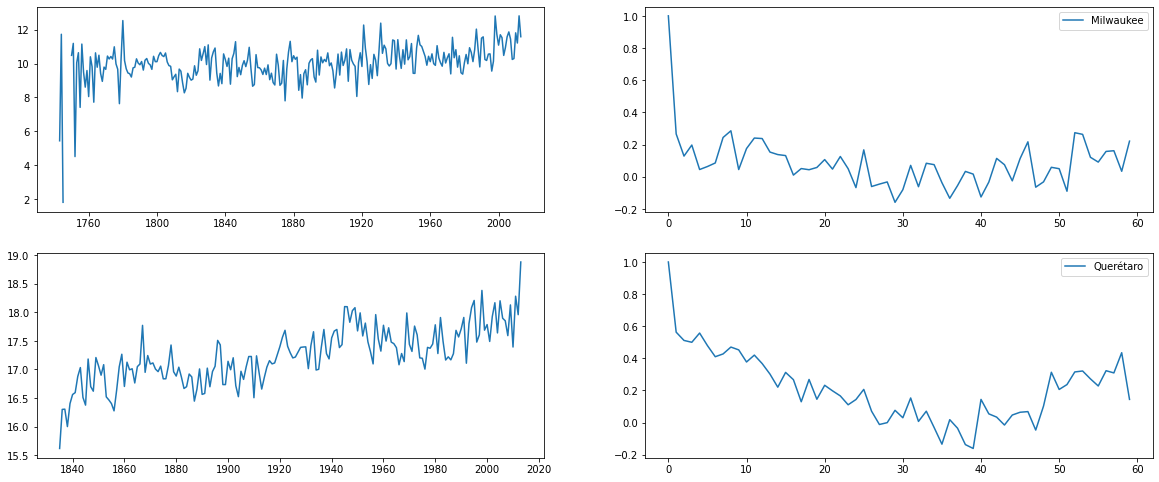

In [39]:
# Take another sample of cities
cities = uniqueCitiesWeather[np.random.randint(0,len(uniqueCitiesWeather),3)]

# Set figure size
plt.figure(figsize=(20, 40))

# For each city in choosen cities
for i, city in enumerate(cities):
    
    # Array for yearly averag temperature at local level
    yearlyAvgTempCityWeather = np.array([])
    
    # For each year in years of sampling
    for year in years:
        
        # The index for cities and years kept same
        indicesCity = np.where((dateWeather.astype("datetime64[Y]") == year) & (cityWeather == city))
        
        # Get the average temperature of the city for the year
        yearlyAvgTempCityWeather = np.append(yearlyAvgTempCityWeather
                                             , np.array([maskedDailyAvgTemp[indicesCity].mean()]))
    
    # Select the subplot
    plt.subplot(len(city), 2, 2*i+1)
    
    # Plot the avegare temperature in city for the years
    plt.plot(years, yearlyAvgTempCityWeather, label=city)
    
    # Here we check the auto correlation of temperature in a city
    # Correlation at lag 0 is 1
    corrYearlyAvgTempWeather= np.array([1])
    
    # Only the data in the last 200 years is reliable, so lags can only be less
    for j in range(1,60):
        
        # Get the correlation coefficient at a specified lags
        # Notice that the avegares for the first 120 years could contain nan vaules
        # so that part of the series is discarded
        value = np.corrcoef(yearlyAvgTempCityWeather[-120:-j], yearlyAvgTempCityWeather[-120+j:])[0,1]
        
        # Store in a NumPy array
        corrYearlyAvgTempWeather = np.append(corrYearlyAvgTempWeather, value)
        
    # Choose the subplot
    plt.subplot(len(city), 2, 2*i+2)
    
    # Plot the data
    plt.plot(range(corrYearlyAvgTempWeather.shape[0]), corrYearlyAvgTempWeather, label=city)
    
    # Don't forget the legend()
    plt.legend()    

# Show the plot
plt.show()

# Delete the temporary variabels 
del indicesCity
del yearlyAvgTempCityWeather


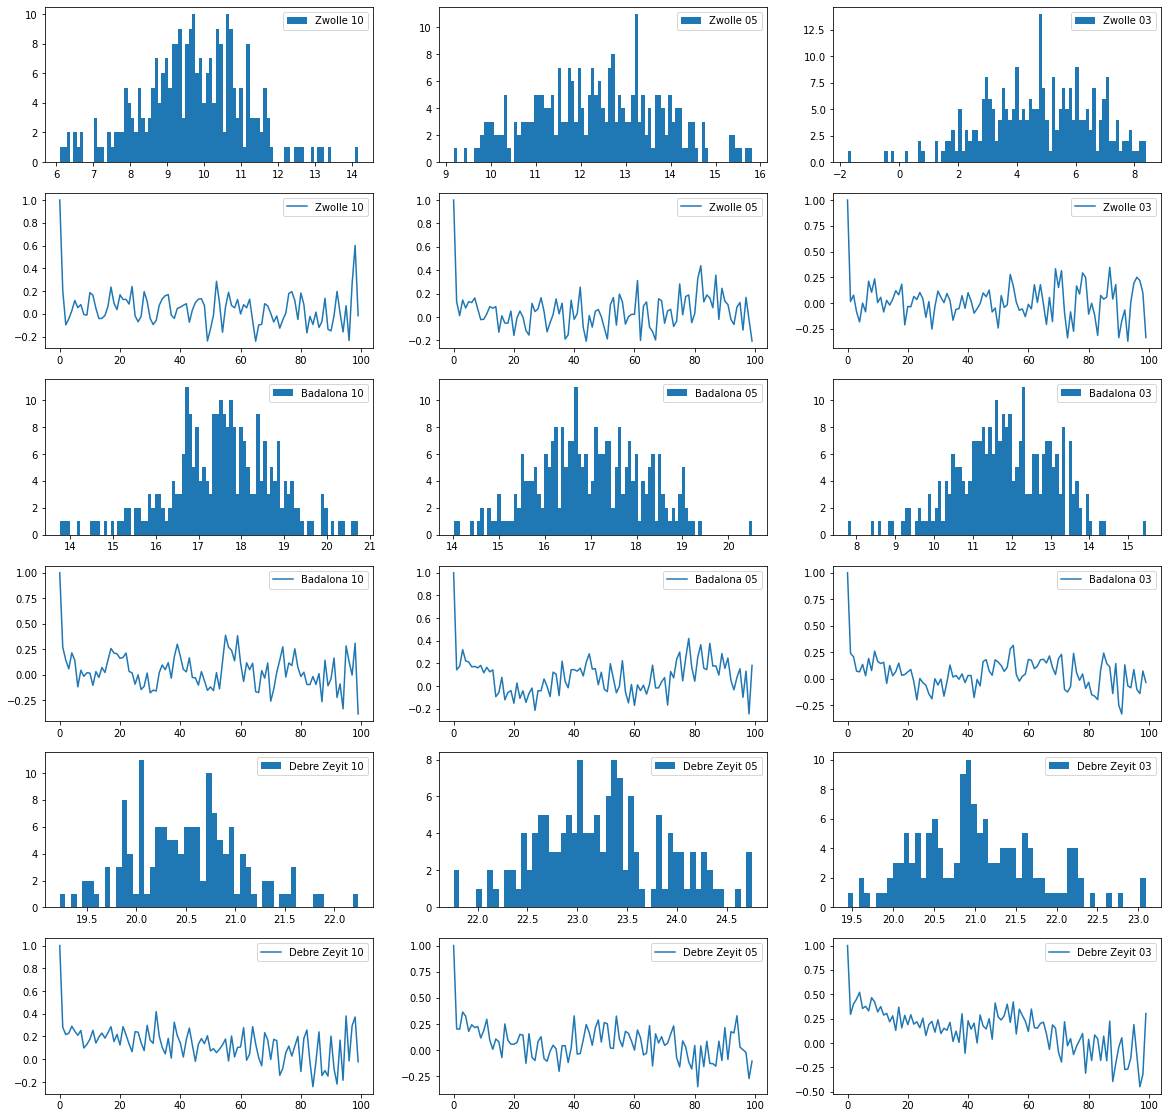

In [11]:
# Take a fresh sample of cities
cities = uniqueCitiesWeather[np.random.randint(0,len(uniqueCitiesWeather),3)]

# NumPy datetime64 does not allow accessing months from dates conveniently
# Hence, date array is converted to Pandas datetime object and months are extracted from them
monthsWeatherSeries = pd.to_datetime(dateWeather).strftime("%m")

# A list of uniqiue months is created
uniqueMonthsWeather = np.unique(monthsWeatherSeries)

# Three months are randomly sampled
months = uniqueMonthsWeather[np.random.randint(0, len(uniqueMonthsWeather), 3)]

# Set the size of plot
plt.figure(figsize=(20, 20))

# For every city in the cities array
for i, city in enumerate(cities):
    
    # For every month in months array
    for j, month in enumerate(months):
        
        # The indices pertaining to specific year and city
        indicesCityMonthWeather = np.where((monthsWeatherSeries == month) & (cityWeather == city))
        
        # Setup the subplots
        plt.subplot(2*len(cities), len(months), 3*2*i+j+1)
        
        # The distribution of temperature during a month in a city over years 
        plt.hist(maskedDailyAvgTemp[indicesCityMonthWeather]
                 
                 # Divide the range of max and min values into intervals
                 , bins=np.linspace(np.min(maskedDailyAvgTemp[indicesCityMonthWeather])
                                    , np.max(maskedDailyAvgTemp[indicesCityMonthWeather])
                                    , len(dailyTempWeather[indicesCityMonthWeather])//3)
                 
                 # Label the city and the number of the month
                 , label = (city+" "+month))
        plt.legend()
        
        # Correlation at lag 0 is 1
        corrMonthCityTempWeather= np.array([1])
        
        # Set figure soze
        #plt.figure(figsize=(10, 10))
        # Only the data in the last 200 years is reliable
        for k in range(1,100):
            
            # Get the correlation coefficient at a specified lags
            # Notice that the avegares for the first 7 years contain nan vaules, 
            #  so that part of the series is discarded
            value = np.corrcoef((dailyTempWeather[indicesCityMonthWeather])[-120:-k]
                                , (dailyTempWeather[indicesCityMonthWeather])[-120+k:])[0,1]
            
            # Store in a NumPy array
            corrMonthCityTempWeather = np.append(corrMonthCityTempWeather, value)
            
        # Plot the data
        plt.subplot(2*len(cities), len(months), 3*2*i+j+4)
        plt.plot(range(corrMonthCityTempWeather.shape[0]), corrMonthCityTempWeather, label=city+" "+month)
        
        # Show the legend
        plt.legend()
        
# Show the plot
plt.show()

In [12]:
# The path to radiation data set
pathRadiationData = "../Documents/coding/greatLearnings/resources/data/radiation_data/SolarPrediction.csv"

# Again, unlike Pandas, we are loading data into multiple arrays
(dateRadiation
 , radiationRadiation
 , tempRadiaiton
 , windDirectionRadiation
 , windSpeedRadiation) = np.loadtxt(pathRadiationData
                                    
                                    # Only date, temperature, radiation, wind speed, and wind directions are loaded
                                    , usecols = (0, 3, 4, 7, 8)
                                    
                                    # The data type of all variables, including date is np.float64
                                    , dtype=np.dtype([("dateRadiation", np.float64)
                                                      , ("tempRadiaiton", np.float64)
                                                      , ("radiationRadiation", np.float64)
                                                      , ("windDirectionRadiation", np.float64)
                                                      , ("windSpeedRadiation", np.float64)])
                                    
                                    # The first row is a header
                                    , skiprows=1
                                    
                                    # Specify the delimiter
                                    , delimiter=","
                                    
                                    # Load data into multiple arrays
                                    , unpack=True
                                    
                                    # Prerocess data
                                    # Temperature, and other varibales is loaded as np.float
                                    , converters={3 : lambda x : np.float64(x.strip() or np.nan)
                                                  , 4 : lambda x : np.float64(x.strip() or np.nan)
                                                  , 7 : lambda x : np.float64(x.strip() or np.nan)
                                                  , 8 : lambda x : np.float64(x.strip() or np.nan)})

In [13]:
# Convert flaot dates to datetime objects
dateRadiation = dateRadiation.astype("datetime64[s]")

In [15]:
# Check the number of entries in the temperature or radiation data
"""The number of observations of radiation are : {:.2f}
, and temperature are {:.2f}""".format(radiationRadiation.shape[0], tempRadiaiton.shape[0])

'The number of observations of radiation are : 32686.00\n, and temperature are 32686.00'

In [16]:
# Check if there are non valid entries in the temperature or radiation data
"""The number of valid observations of radiation are : {:.2f}
, and temperature are {:.2f}""".format(np.count_nonzero(~np.isnan(radiationRadiation))
                                       , np.count_nonzero(~np.isnan(tempRadiaiton)))

'The number of valid observations of radiation are : 32686.00\n, and temperature are 32686.00'

In [17]:
# The mean values of the data
"Mean solar radiation is : {:.2f}, and mean temperature is {:.2f}".format(radiationRadiation.mean()
                                                                          , tempRadiaiton.mean())

'Mean solar radiation is : 207.12, and mean temperature is 51.10'

In [20]:
# The variations in the data
"variation in solar radiation is {:.2f}, and temperature is {:.2f}".format(radiationRadiation.std()
                                                                           , tempRadiaiton.std())

'variation in solar radiation is 315.91, and temperature is 6.20'

In [21]:
# Min and max in the data
"""maximum radiation is {:.2f}, and minimum radiation i s{:.2f}
, maximum temperature is {:.2f}, and minimum temperature is {:.2f}""".format(radiationRadiation.max()
                                                                            , radiationRadiation.min()
                                                                            , tempRadiaiton.max()
                                                                            , tempRadiaiton.min())

'maximum radiation is 1601.26, and minimum radiation i s1.11\n, maximum temperature is 71.00, and minimum temperature is 34.00'

In [22]:
# The corelation between temperature and solar radiation is expected to be high
# but it is not
corr = np.corrcoef(radiationRadiation
                   , tempRadiaiton[np.logical_not(np.isnan(radiationRadiation))])
"The correlation coefficient between temperature and solar radiation is: {:.2f}".format(corr[0,1])

'The correlation coefficient between temperature and solar radiation is: 0.73'

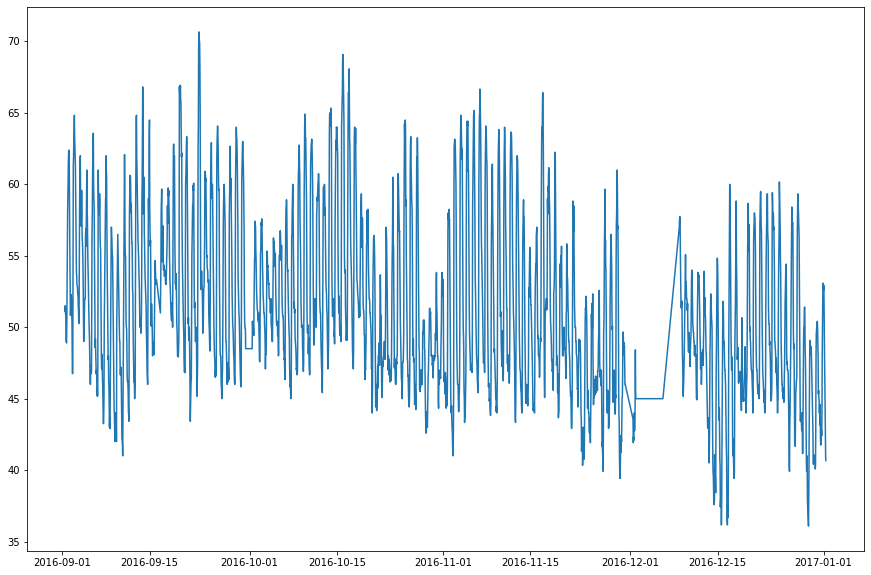

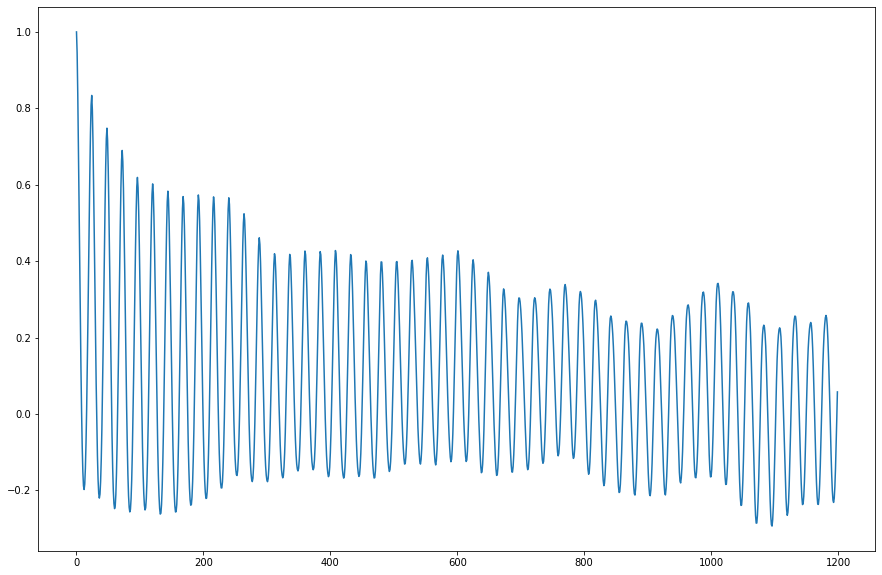

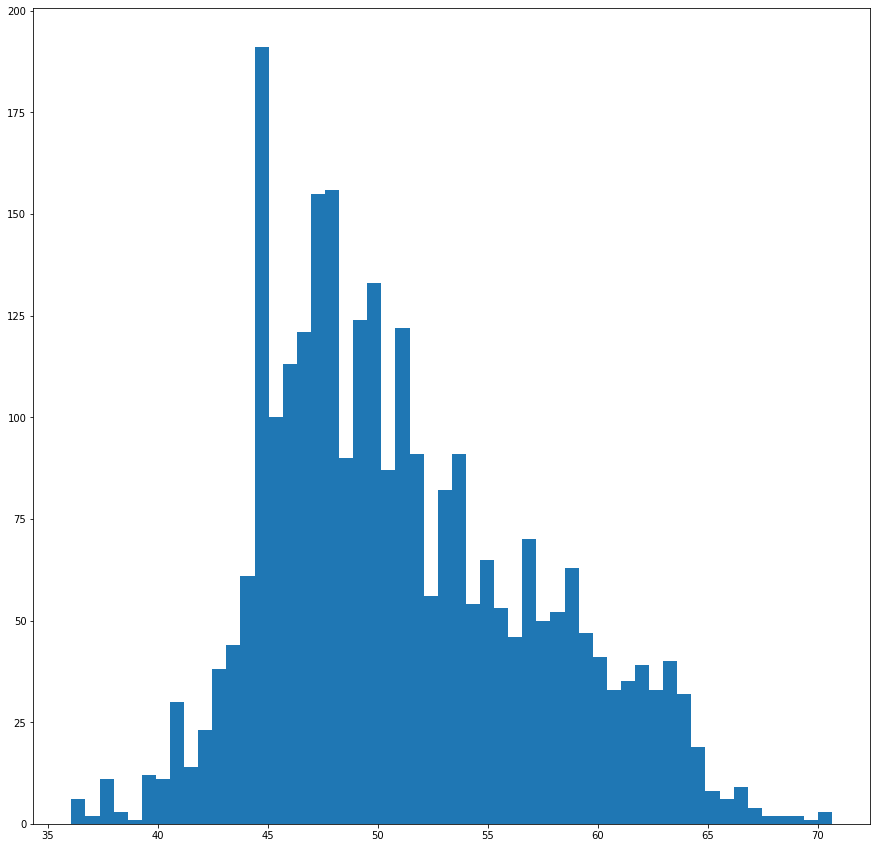

In [64]:
# An array to store the hourly average temperature values 
avgHourlyTeampRadiation = np.array([])

# Unique hours in the data
hoursRadiation = np.unique(dateRadiation.astype("datetime64[h]"))

# Loop through the values in the data
for hour in hoursRadiation:
    
    # The indices corresponding to an hour in the data
    indicesHourlyRadiation = np.where(dateRadiation.astype("datetime64[h]") == hour)
    
    # Find and append the mean temperture 
    avgHourlyTeampRadiation = np.append(avgHourlyTeampRadiation
                                        , tempRadiaiton[indicesHourlyRadiation].mean() or np.nan)
    
# Set the figure size
plt.figure(figsize=(15, 10))
# Plot mean hourly temperature 
plt.plot(hoursRadiation, avgHourlyTeampRadiation)
plt.show()

# Correlation at lag 0 is 1
corrHourlyTempRadiation= np.array([1])

# Set figure soze
#plt.figure(figsize=(10, 10))
# Only the data in the last 200 years is reliable
for k in range(1,1200):

    # Get the correlation coefficient at a specified lags
    # Notice that the avegares for the first 7 years contain nan vaules, 
    #  so that part of the series is discarded
    value = np.corrcoef(avgHourlyTeampRadiation[k:], avgHourlyTeampRadiation[:-k])[0,1]

    # Store in a NumPy array
    corrHourlyTempRadiation = np.append(corrHourlyTempRadiation, value)

plt.figure(figsize=(15, 10))
# Plot the data
plt.plot(range(corrHourlyTempRadiation.shape[0]), corrHourlyTempRadiation)
plt.show()
plt.figure(figsize=(15, 15))
bins = np.linspace(avgHourlyTeampRadiation.min(), avgHourlyTeampRadiation.max(), avgHourlyTeampRadiation.shape[0]//50)
plt.hist(avgHourlyTeampRadiation, bins = bins)
plt.show()

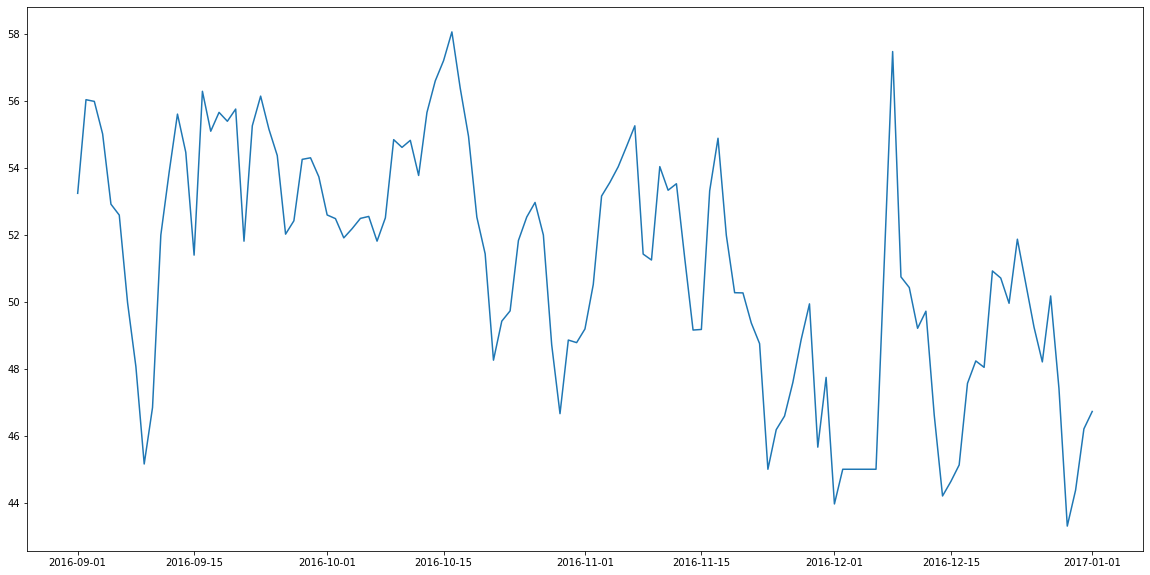

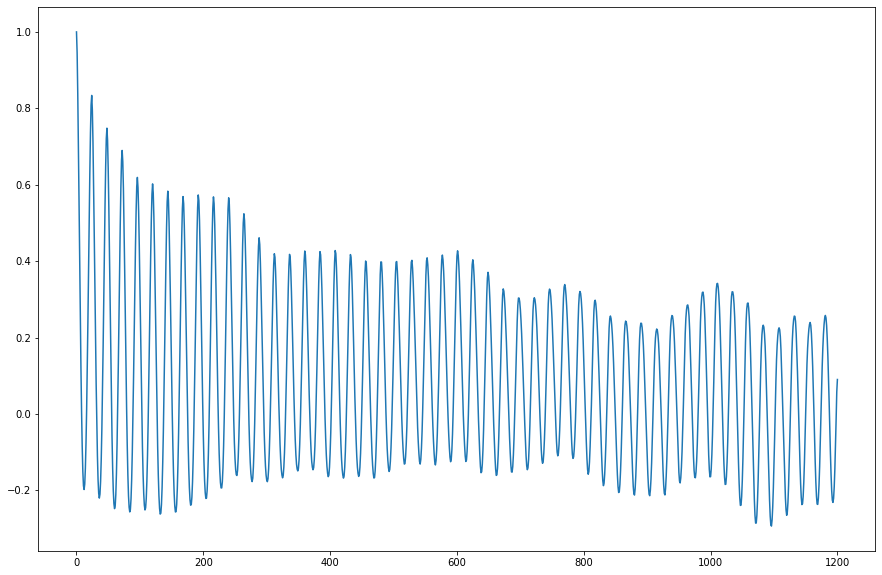

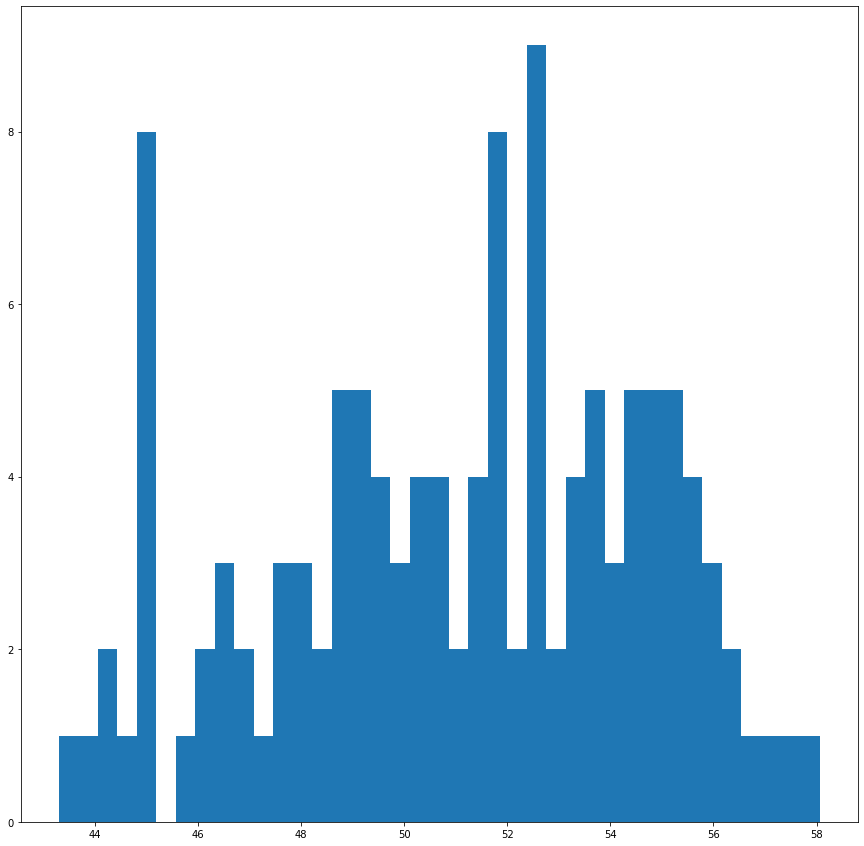

In [68]:
# Average daily temperature valeus
avgDailyTeampRadiation = np.array([])

# Unique days in radiation data
daysRadiation = np.unique(dateRadiation.astype("datetime64[D]")) 

# Loop through all days
for day in daysRadiation:
    
    # The indices corresponding to specific days in the data
    indicesDailyRadiation = np.where(dateRadiation.astype("datetime64[D]") == day)
    
    # Find and append the 
    avgDailyTeampRadiation = np.append(avgDailyTeampRadiation, tempRadiaiton[indicesDailyRadiation].mean() or np.nan)

# Set the figure size
plt.figure(figsize=(20, 10))

# Plot the data
plt.plot(daysRadiation, avgDailyTeampRadiation)
plt.show()

# Correlation at lag 0 is 1
corrDailyTempRadiation= np.array([1])

# Set figure soze
#plt.figure(figsize=(10, 10))
# Only the data in the last 200 years is reliable
for k in range(1,100):

    # Get the correlation coefficient at a specified lags
    # Notice that the avegares for the first 7 years contain nan vaules, 
    #  so that part of the series is discarded
    value = np.corrcoef(avgDailyTeampRadiation[k:], avgDailyTeampRadiation[:-k])[0,1]

    # Store in a NumPy array
    corrDailyTempRadiation = np.append(corrHourlyTempRadiation, value)

plt.figure(figsize=(15, 10))
# Plot the data
plt.plot(range(corrDailyTempRadiation.shape[0]), corrDailyTempRadiation)
plt.show()

plt.figure(figsize=(15, 15))
bins = np.linspace(avgDailyTeampRadiation.min(), avgDailyTeampRadiation.max(), avgDailyTeampRadiation.shape[0]//3)
plt.hist(avgDailyTeampRadiation, bins = bins)
plt.show()

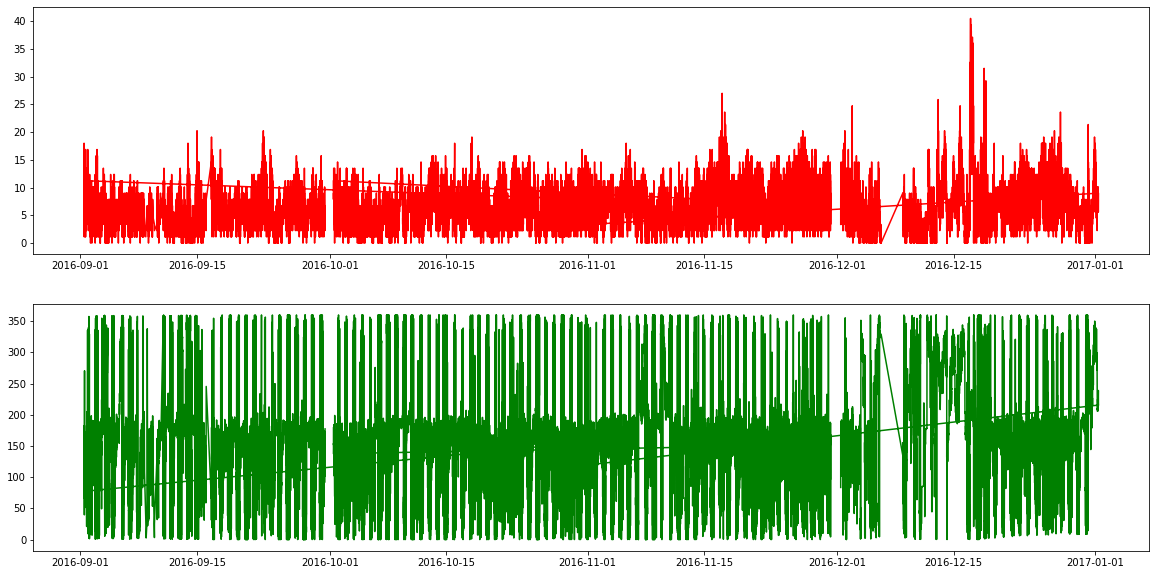

In [69]:
plt.figure(figsize=(20, 10))
plt.subplot(211)
plt.plot(dateRadiation, windSpeedRadiation, "r")
plt.subplot(212)
plt.plot(dateRadiation, windDirectionRadiation, "g")
plt.show()

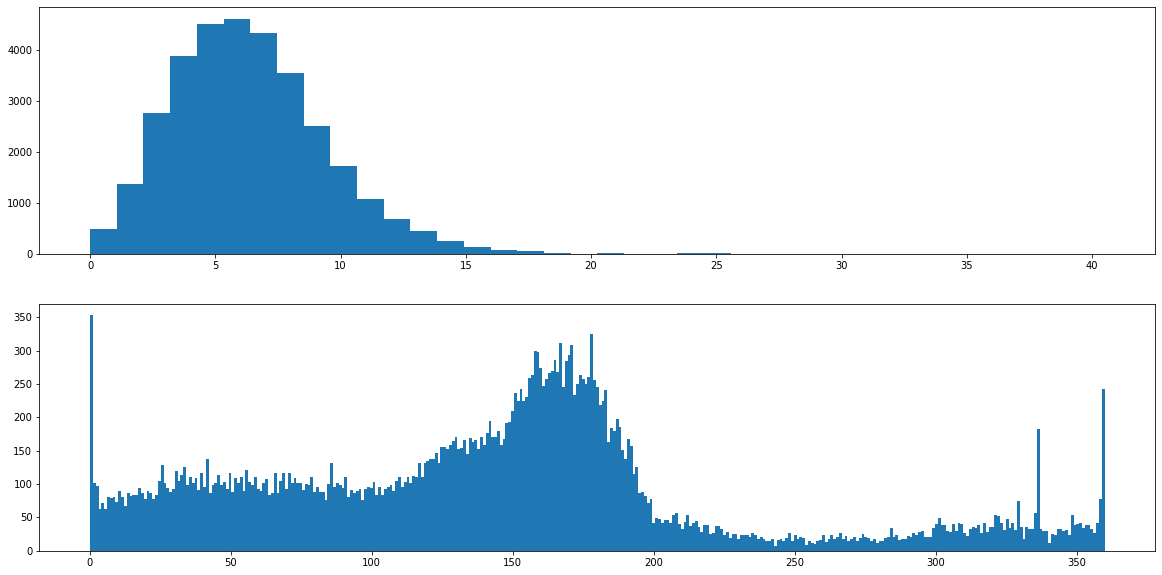

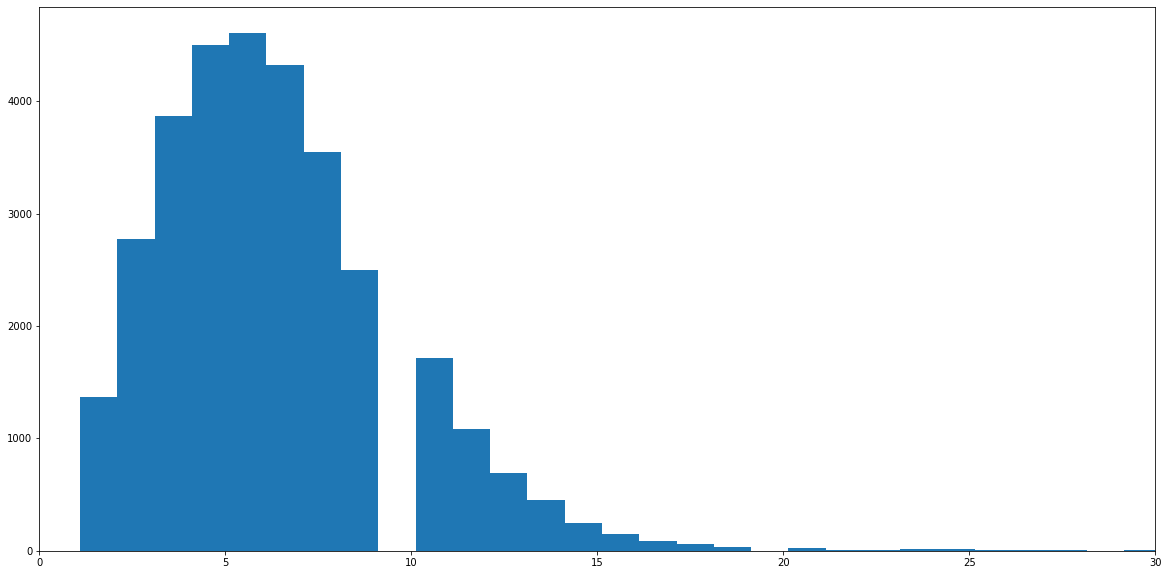

In [70]:
plt.figure(figsize=(20, 10))
plt.subplot(211)
binsWindSpeedRadiation = np.linspace(windSpeedRadiation.min(), windSpeedRadiation.max(), 39)
plt.hist(windSpeedRadiation, binsWindSpeedRadiation)
plt.subplot(212)
binsWindDirRadiation = np.linspace(windDirectionRadiation.min(), windDirectionRadiation.max(), 360)
plt.hist(windDirectionRadiation, binsWindDirRadiation)
plt.show()
plt.figure(figsize=(20, 10))
binsWindSpeedRadiation = np.linspace(windSpeedRadiation.min(), windSpeedRadiation.max(), 200)
plt.hist(windSpeedRadiation, binsWindDirRadiation)
plt.xlim(0, 30)
plt.show()

In [ ]:
windDirectionRadiation = ma.masked_invalid(windDirectionRadiation)

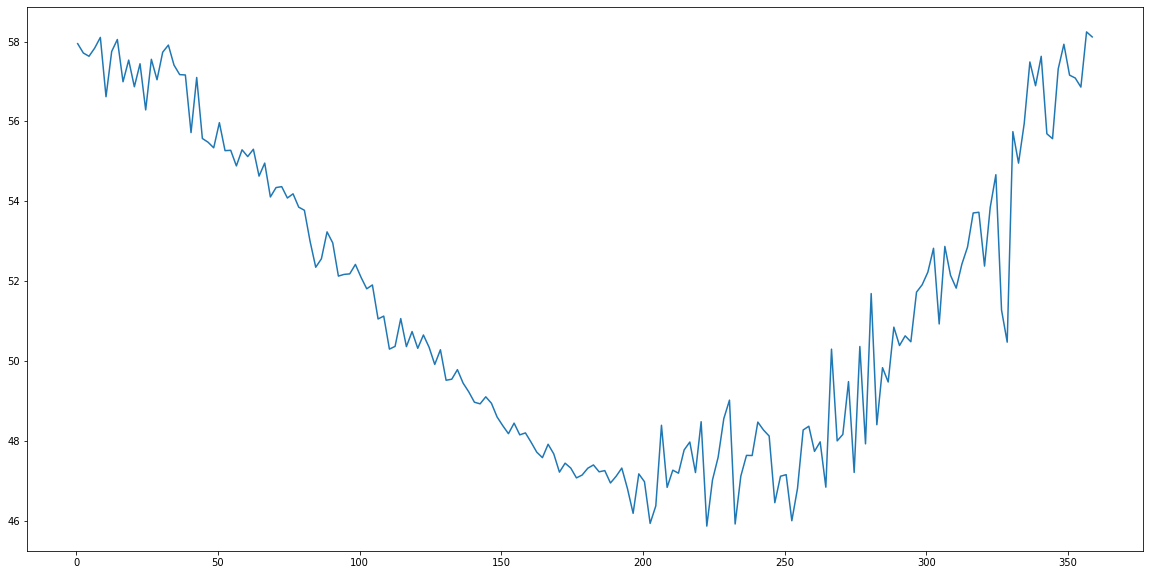

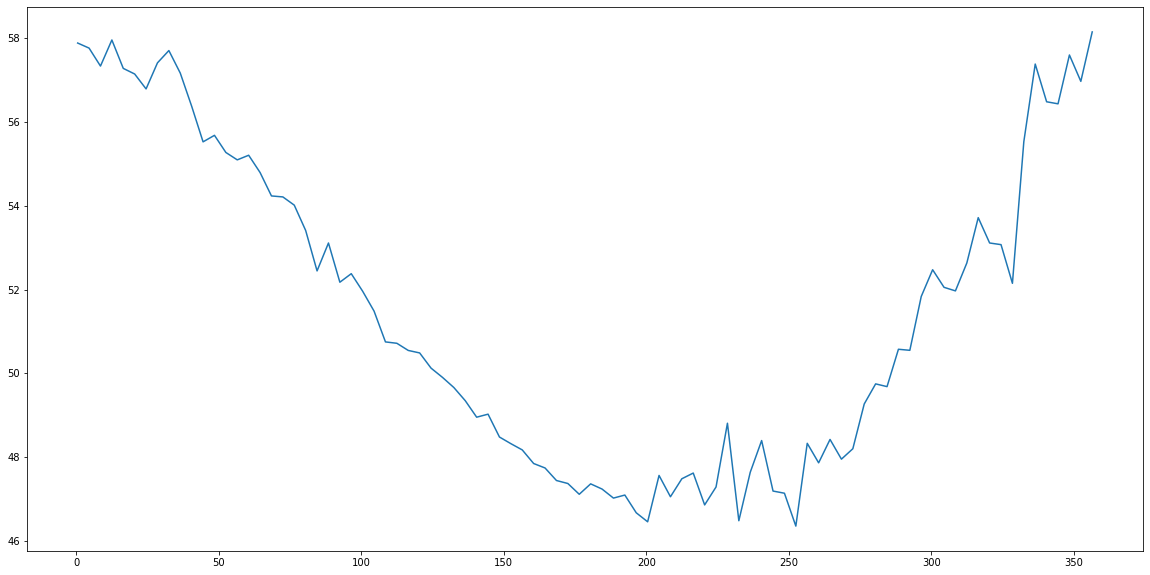

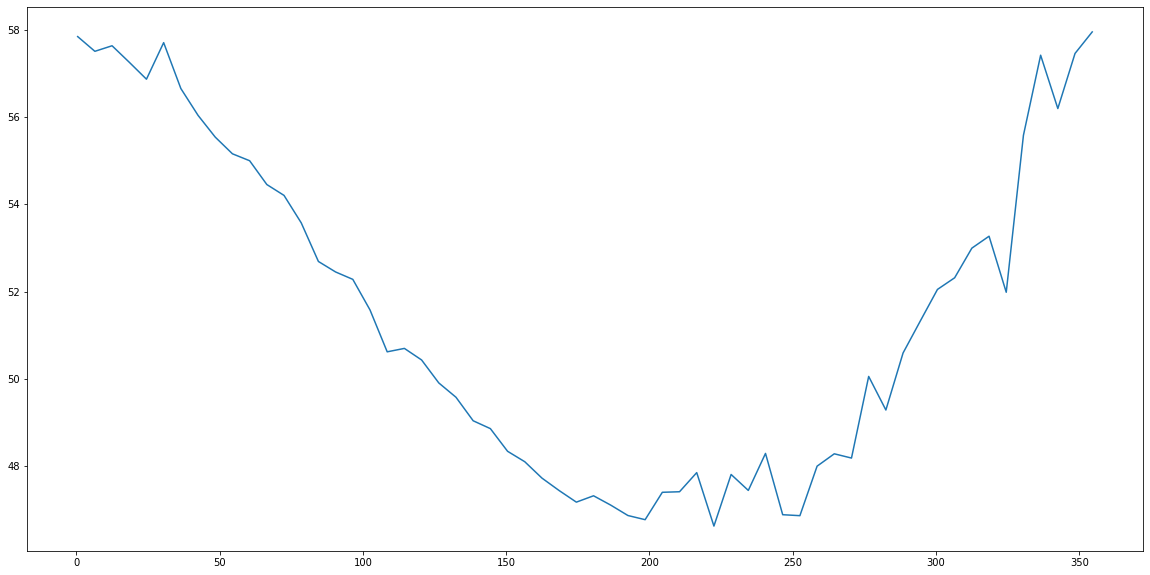

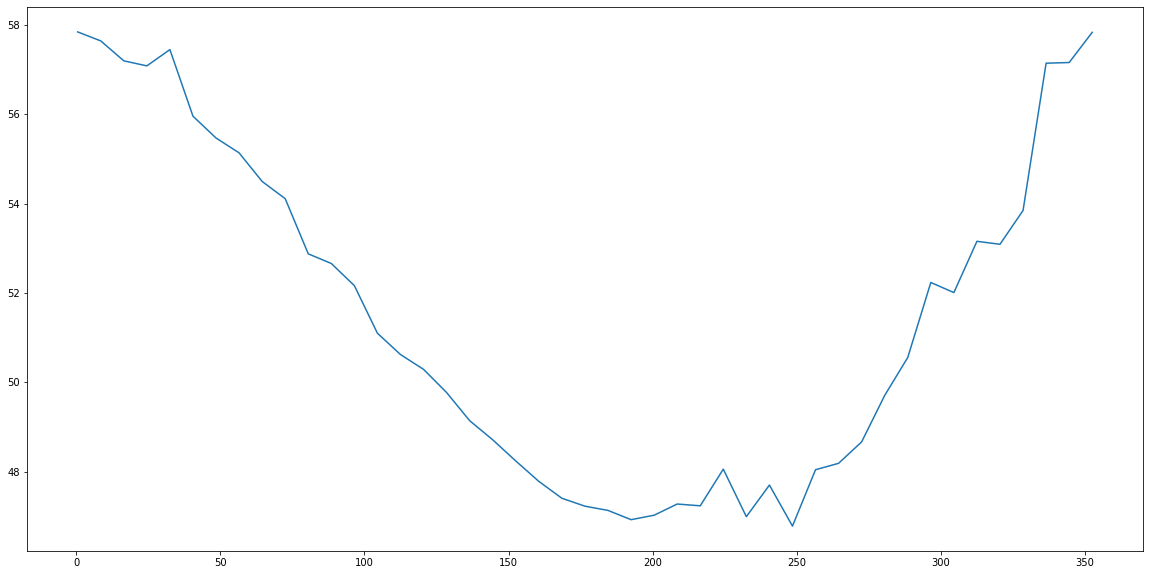

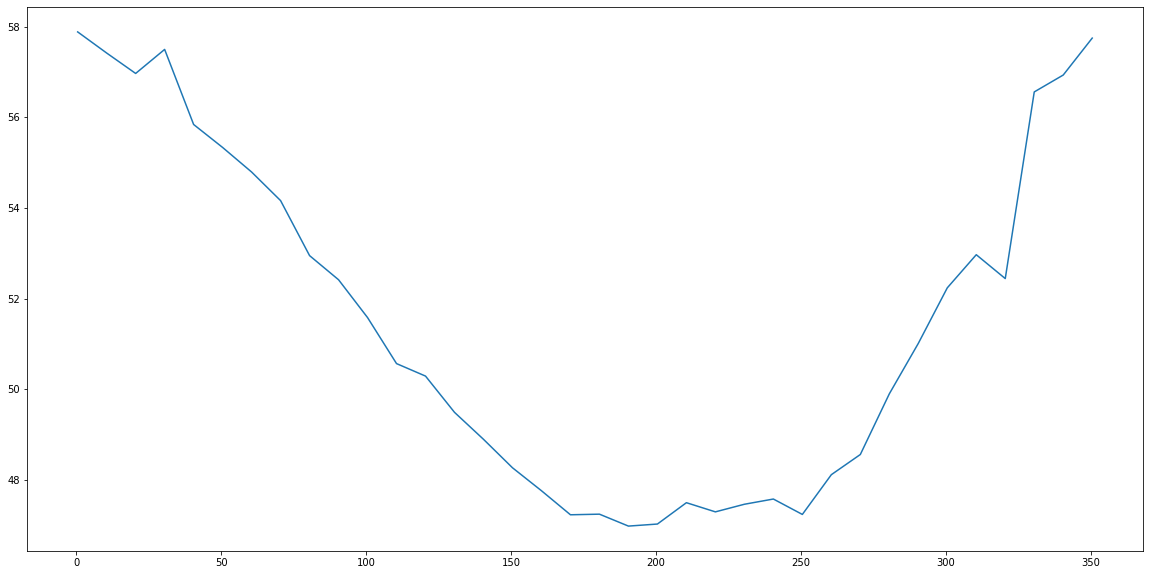

In [71]:
for i in [2, 4, 6, 8, 10]:
    avgs = []
    for direction in range(0,360,i):
        indices = np.where((windDirectionRadiation > direction )& (windDirectionRadiation < direction+i))
        avgs.append(tempRadiaiton[indices].mean())
    plt.figure(figsize=(20, 10))
    plt.plot(np.arange(0,360,i)+0.5, avgs)
    plt.show()

In [ ]:
plt.figure(figsize=(20, 10))
plt.plot(np.arange(0,360,2)+0.5, avgs)
plt.show()

In [ ]:
avgHourlyWindSpeedRadiation = np.array([])
for hour in np.unique(dateRadiation.astype("datetime64[h]")):
    indices = np.where(dateRadiation.astype("datetime64[h]") == hour)
    mean = windSpeedRadiation[indices].mean() or np.nan
    avgHourlyWindSpeedRadiation = np.append(avgHourlyWindSpeedRadiation, mean)
    print(mean)

In [ ]:
plt.plot(dateRadiation.astype("datetime64[h]"), avgHourlyWindSpeedRadiation)

In [ ]:
tempData = pd.Series(avgTemp, index=date)
tempData

In [ ]:
plt.figure(figsize=(20, 10))
pd.plotting.lag_plot(tempData, 10)
plt.show()

In [ ]:
tempDataRadiation = pd.Series(tempRadiaiton, index=dateRadiation)
tempDataRadiation

In [ ]:
plt.figure(figsize=(20, 10))
pd.plotting.autocorrelation_plot(tempDataRadiation)

In [ ]:
aCity = np.unique(city)[10]

In [ ]:
len(avgTemp)

In [ ]:
indices = np.where(city == aCity)

In [ ]:
pd.plotting.lag_plot(pd.Series(avgTemp[indices], index = date[indices]), 12)

In [ ]:
indices

In [ ]:
aSeries = pd.Series(avgTemp[indices], index = date[indices])
for i in range(1,13):
    plt.figure(figsize = (5, 5))
    pd.plotting.lag_plot(aSeries, i)
    plt.show()


In [ ]:
pd.plotting.autocorrelation_plot(aSeries[-20:])

In [ ]:
autoR = [pd.Series.autocorr(aSeries, i) for i in range(len(aSeries))]
autoR

In [ ]:
plt.plot(range(120), autoR[:120])

In [ ]:
aplt.figure(figsize=(20, 10))
plt.plot(date[indices], avgTemp[indices])

In [ ]:
pd.Series(avgTemp[indices], index = date[indices])

In [ ]:
plt.figure(figsize=(20, 10))
pd.plotting.autocorrelation_plot?

In [ ]:
plt.figure(figsize=(20, 10))
aSeries.resample("A").plot()[0]
plt.show()

In [ ]:
plt.plot(anotherSeries.resample("A").mean())

In [ ]:
monthlyTemp = anotherSeries.groupby(anotherSeries.index.strftime("%B")).mean()

In [ ]:
plt.figure(figsize=(20, 10))
plt.plot(monthlyTemp.sort_index())

In [ ]:
anotherSeries.index

In [ ]:
stocksData = pd.read_csv("../Documents/coding/greatLearnings/resources/data/stocksData/NIFTY50_all.csv", index_col= "Date")

In [ ]:
stocksData

In [ ]:
maskedArray = ma.masked_invalid(dailyTempWeather)
montlyMeanTempBerlinWeather = np.array([])
for month in range(12):
    monthlyIndices = np.where(np.int64(dateWeather.astype(object)).month == month and cityWeather == "Berlin")
    montlyMeanTempBerlinWeather = np.append(montlyMeanTempBerlinWeather, maskedArray[monthlyIndices].mean())
    print(maskedArray[monthlyIndices].mean())

In [ ]:
cutoff = 9 * len(tempRadiaiton)//10
cutoff

In [ ]:
poly = np.polyfit(tempRadiaiton[:cutoff-1], tempRadiaiton[1:cutoff], 2)
poly

In [ ]:
fit = np.polyval(poly, tempRadiaiton[cutoff:-1])
fit

In [ ]:
((tempRadiaiton[cutoff+1:]-fit)**2).mean()

In [ ]:

plt.plot(tempRadiaiton[cutoff:-1], tempRadiaiton[cutoff+1:])

In [ ]:
(x, residuals, rank, s) = np.linalg.lstsq(np.vstack((tempRadiaiton[:cutoff-2], tempRadiaiton[1:cutoff-1])).T, tempRadiaiton[2:cutoff])

In [ ]:
x

In [ ]:
fit = x[0]*tempRadiaiton[cutoff-1:-2] + x[1]*tempRadiaiton[cutoff:-1] 

In [ ]:
delta = tempRadiaiton[cutoff + 1:] - fit

In [ ]:
delta.max()

In [ ]:
plt.hist(delta, bins = np.linspace(np.floor(delta.min()), np.floor(delta.max()), 1000))
plt.show()

In [ ]:
    dateWeather.astype(object).month

### Chapter Five: Signal Processing Techniques
A number of interesting thigs can be accompolished in the domain of signal processing wth Python and NumPy.

1. Determining periodic cycles within the data.
2. Smoothing the data to filter out noise.
3. Forecasting

#### Indroducing the Sunspot data

In [122]:
!pip3 install statsmodels

In [232]:
# Importing usefullibraries
import numpy as np
import sys
import matplotlib.pyplot as plt
import pandas as pd
# Signal module is used for Signal Processingb
from scipy import signal
from scipy import interpolate
import statsmodels.api as sm
import datetime

In [31]:
# Loading th requird file 

# Set up the path of the file
path = "../resources/data/sunspot_data2/Sunspots.csv"

# The data is loaded into two arrays, not into one matrix
(dateSunspot
# The pat of the file to be fetched
, sunspotsSunspot) = np.loadtxt(path
# Use only columns corresponding to date and sunspot numbers 
, usecols=(1, 2)
# Unpack the data into multiple arrays
, unpack=True
# Skip the first row
, skiprows=1
# Set the delimiter to a comma
, delimiter=","
# Specify the datatypes of each colums
# Again, this datetime654[s] thing is confusing
, dtype=np.dtype([("date", "datetime64[s]")
, ("sunspots", np.float64)])
# Preprocess the data to be loaded
, converters={1: lambda x: x.decode("utf-8")
, 2: lambda x: np.float64(x.strip() or nan)})

Let us try to undestand the data before we proceed to any analysis.


In [32]:
# The size of the data and number of invalid values
print("The number of records is {}, and {} records are invalid.".format(sunspotsSunspot.shape[0], np.isnan(sunspotsSunspot).sum()))


The number of records is 3265, and 0 records are invalid.


In [33]:
# The max, min, mean, median and standard deviation of the data

# Getting the mean
print("The mean of the data is {:.2f}, the median is {:.2f}, the maximum is {:.2f}, the minimum is {:.2f}, the standard deviation is {:.2f}".format(np.mean(sunspotsSunspot)
, np.median(sunspotsSunspot)
, np.max(sunspotsSunspot)
, np.min(sunspotsSunspot)
, np.std(sunspotsSunspot)))

The mean of the data is 81.78, the median is 67.20, the maximum is 398.20, the minimum is 0.00, the standard deviation is 67.88


In [34]:
# The autocorrelation function to calculate autocorrelation at different lags

# The function defenition
def autoCorrelation(data):
    
    # The NumPy array to store the autocorrelations
    autoCorrelationData = np.array([1])
    for lag in range(9*data.shape[0]//10):

        # Append autocorrelation to the array
        autoCorrelationData = np.append(autoCorrelationData, np.corrcoef(data[lag+1:], data[:-(lag+1)])[0,1])

    # Return autocorrelation
    return autoCorrelationData

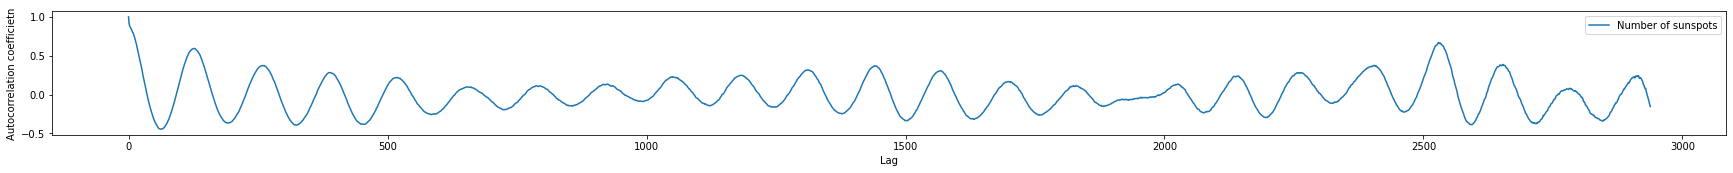

In [35]:
# Get the autocorrelation of the sunspot data
sunspotAutoCorrelationSunspot = autoCorrelation(sunspotsSunspot)

# Set the figure size
plt.figure(figsize=(30, 5))

# Setting the subplot
plt.subplot(2, 1, 1)

# Plot the autocorrelation funciton against lags
plt.plot(sunspotAutoCorrelationSunspot, label="Number of sunspots")

plt.xlabel("Lag")
plt.ylabel("Autocorrelation coefficietn")

# Display the legend
plt.legend()

# Show the figure
plt.show()

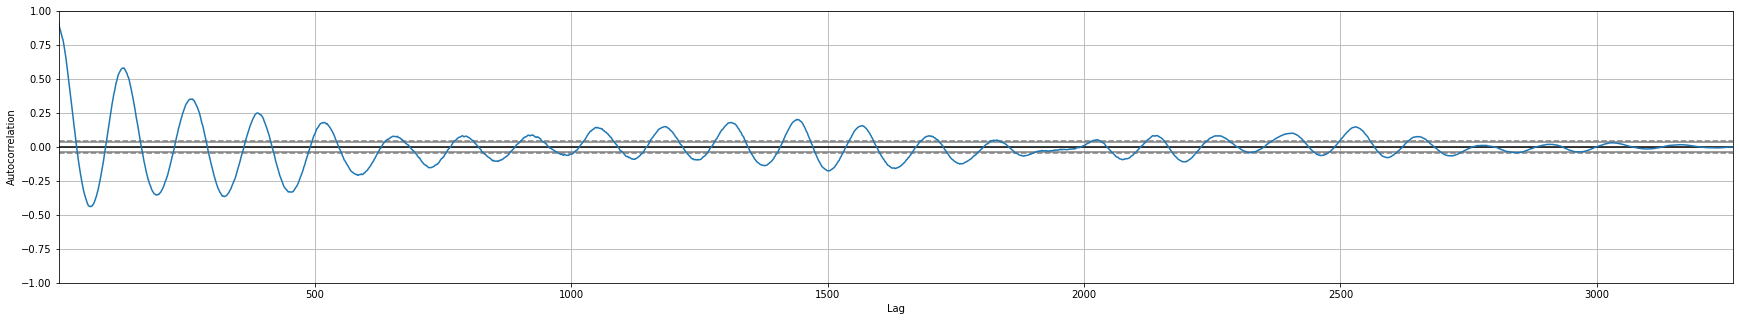

In [36]:
# We can compare this result with the inbult function

# Set the figure size
plt.figure(figsize=(30, 5))

# Calling the inbuilt function for autocorrelation
pd.plotting.autocorrelation_plot(pd.Series(sunspotsSunspot, index=dateSunspot))

plt.show()

A look at the data can be helpful in understanding it well

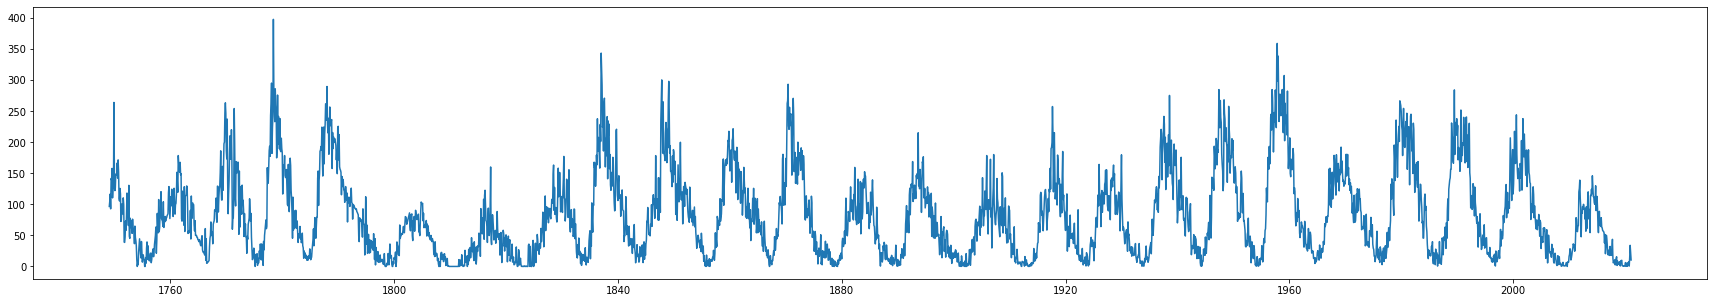

In [37]:
# Set the figure size
plt.figure(figsize=(30, 5))

# Plot the number of sunspots against date
plt.plot(dateSunspot, sunspotsSunspot)

# Show the plot
plt.show()

In [38]:
# Finding local characterstics of data

# This is the index of local minimums
minsLocalSunspot = signal.argrelmin(sunspotsSunspot)[0]

# This is the index of local maximums
maxsLocalSunspot = signal.argrelmax(sunspotsSunspot)[0]

# Both of them are concatenated in this array
extremaLocalSunspot = np.concatenate((minsLocalSunspot, maxsLocalSunspot))

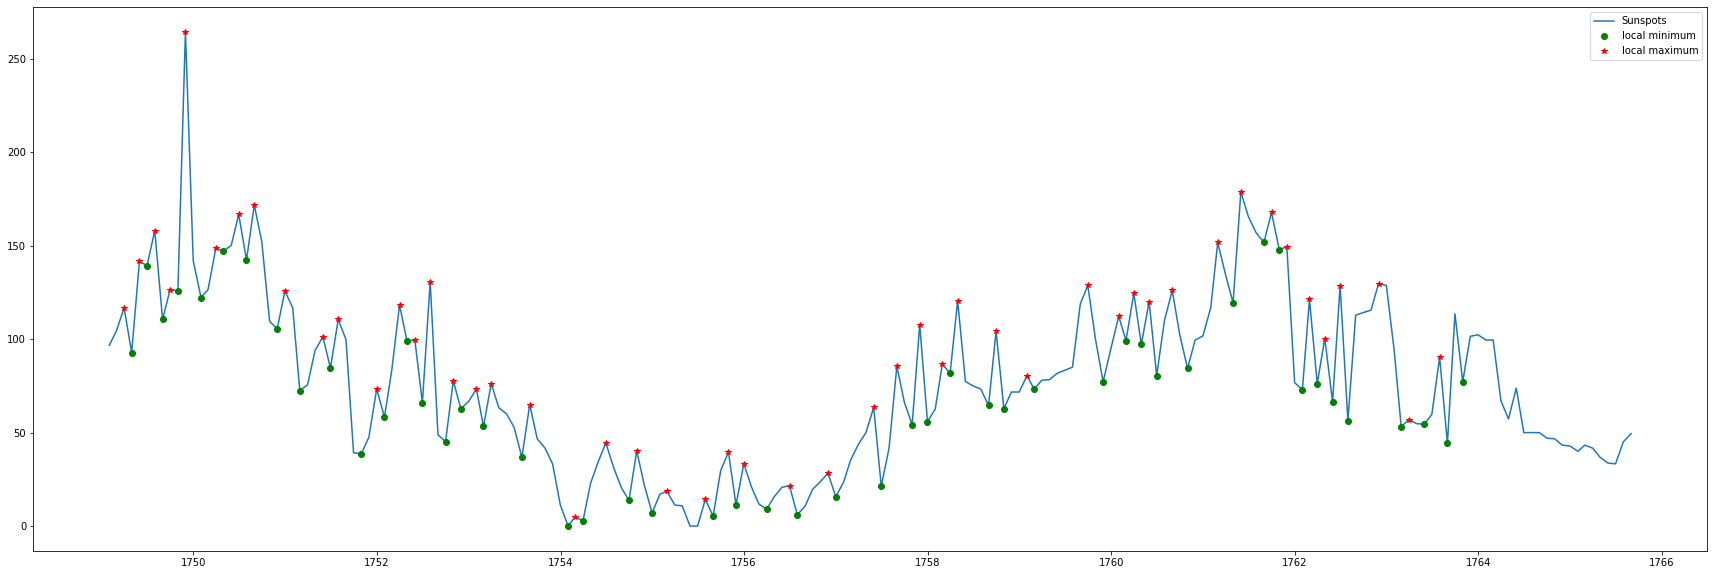

In [39]:
# We can visualize the local maximum and minimums against the given data

# Set the size of the plot
plt.figure(figsize=(30, 10))

# Plot the number of sunspots against time
plt.plot(dateSunspot[:200], sunspotsSunspot[:200], label="Sunspots")

# Mark the local minima with green dots
plt.plot(dateSunspot[minsLocalSunspot[:50]].T[:50], sunspotsSunspot[minsLocalSunspot[:50]], "go", label="local minimum")

# # Mark the loacl maxima with red stars
plt.plot(dateSunspot[maxsLocalSunspot[:50]].T[:50],sunspotsSunspot[maxsLocalSunspot[:50]], "r*", label="local maximum")

plt.legend()
# Show the plot
plt.show()

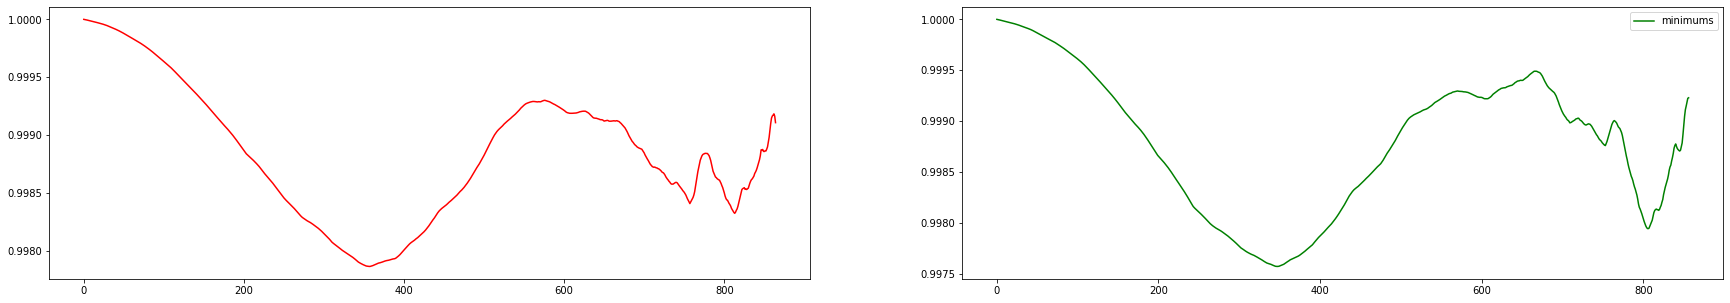

In [40]:
# Set up the size of the figure
plt.figure(figsize=(30, 5))

# Calculate the autocorrelation of 

# Autocorrelation among local minimums
autoCorrelationMinSunspotsSunspot = autoCorrelation(minsLocalSunspot)

# Autocorrelation among local maximumx
autoCorrelationMaxSunspotsSunspot = autoCorrelation(maxsLocalSunspot)

# Choose the subplot
plt.subplot(1, 2, 1)

# Plot the autocorrelation among maximums
plt.plot(range(autoCorrelationMaxSunspotsSunspot.shape[0]), autoCorrelationMaxSunspotsSunspot, "r", label="maximums")

# Choose the subplot
plt.subplot(1, 2, 2)

# Plot the autocorrelation among minimums
plt.plot(range(autoCorrelationMinSunspotsSunspot.shape[0]), autoCorrelationMinSunspotsSunspot, "g", label="minimums")

# Show the legend
plt.legend()

# Plot the graph
plt.show()

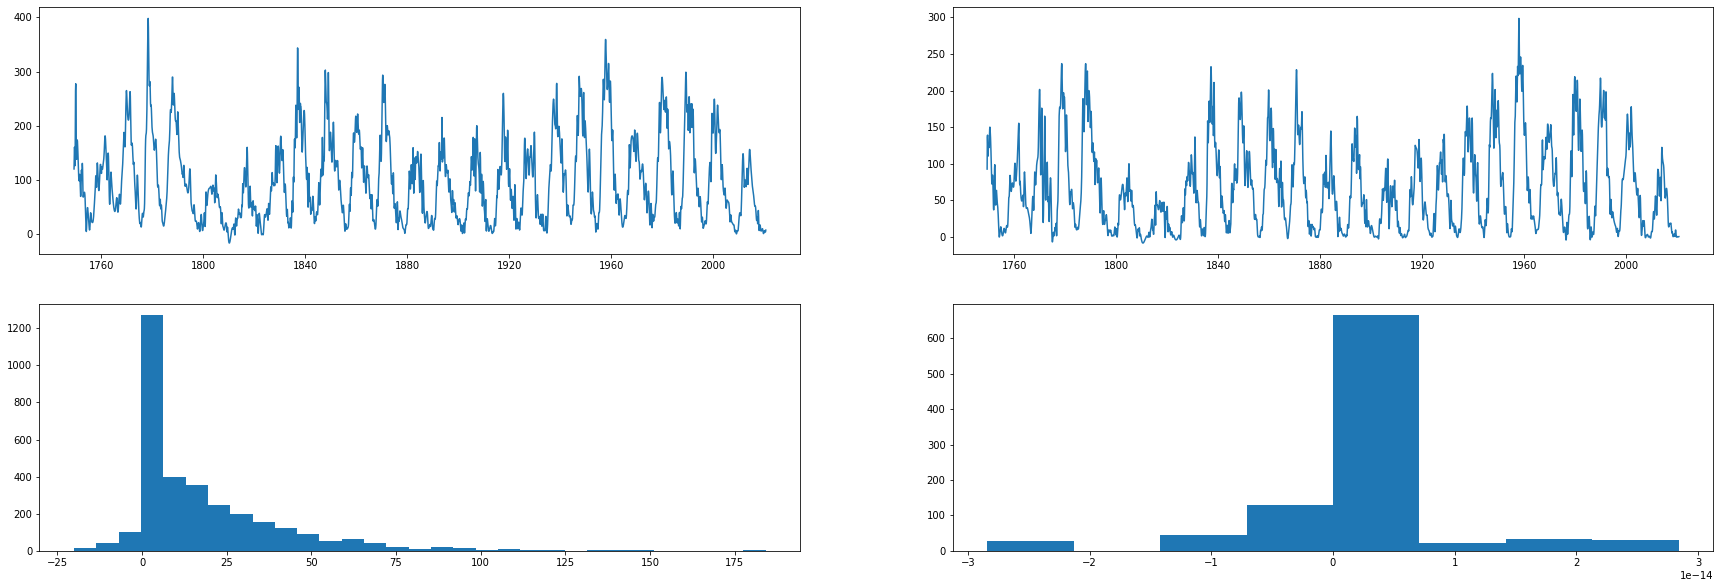

In [41]:
# Set the figure size
plt.figure(figsize=(30, 10))

# Choose the subplot
plt.subplot(2,2,1)

# Make a spline interpolation among the local maximum of sunspots
splineMaxSunspot = interpolate.interp1d(dateSunspot.astype(np.float64)[maxsLocalSunspot], sunspotsSunspot[maxsLocalSunspot], kind="cubic")

# Plot the spline interpolation of local maximum of sunspots
plt.plot(dateSunspot[minsLocalSunspot[0]:minsLocalSunspot[-1]], splineMaxSunspot(dateSunspot[minsLocalSunspot[0]:minsLocalSunspot[-1]]), label="maximum")

# Make a spline interpolation among the local minimum of sunspots
splineMinSunspot = interpolate.interp1d(dateSunspot.astype(np.float64)[minsLocalSunspot], sunspotsSunspot[minsLocalSunspot], kind="cubic")

# Choose the subplot
plt.subplot(2,2,2)

# Plot the spline interpolation of locla minimum of sunspots
plt.plot(dateSunspot[minsLocalSunspot[0]:minsLocalSunspot[-1]], splineMinSunspot(dateSunspot[minsLocalSunspot[0]:minsLocalSunspot[-1]]), label="minimum")

# Find the difference between actal data and the spline interpolation of minimum sunspots
deltaSplineMinSunspot = splineMinSunspot(dateSunspot[minsLocalSunspot])-sunspotsSunspot[minsLocalSunspot]


deltaSplineMaxSunspot = splineMaxSunspot(dateSunspot[maxsLocalSunspot[0]:maxsLocalSunspot[-1]])-sunspotsSunspot[maxsLocalSunspot[0]:maxsLocalSunspot[-1]]


plt.subplot(2,2,3)


plt.hist(deltaSplineMaxSunspot, bins=np.linspace(np.min(deltaSplineMaxSunspot), np.max(deltaSplineMaxSunspot), deltaSplineMaxSunspot.shape[0]//100))


plt.subplot(2,2,4)


plt.hist(deltaSplineMinSunspot, bins=np.linspace(np.min(deltaSplineMinSunspot), np.max(deltaSplineMinSunspot), deltaSplineMinSunspot.shape[0]//100))


plt.show()

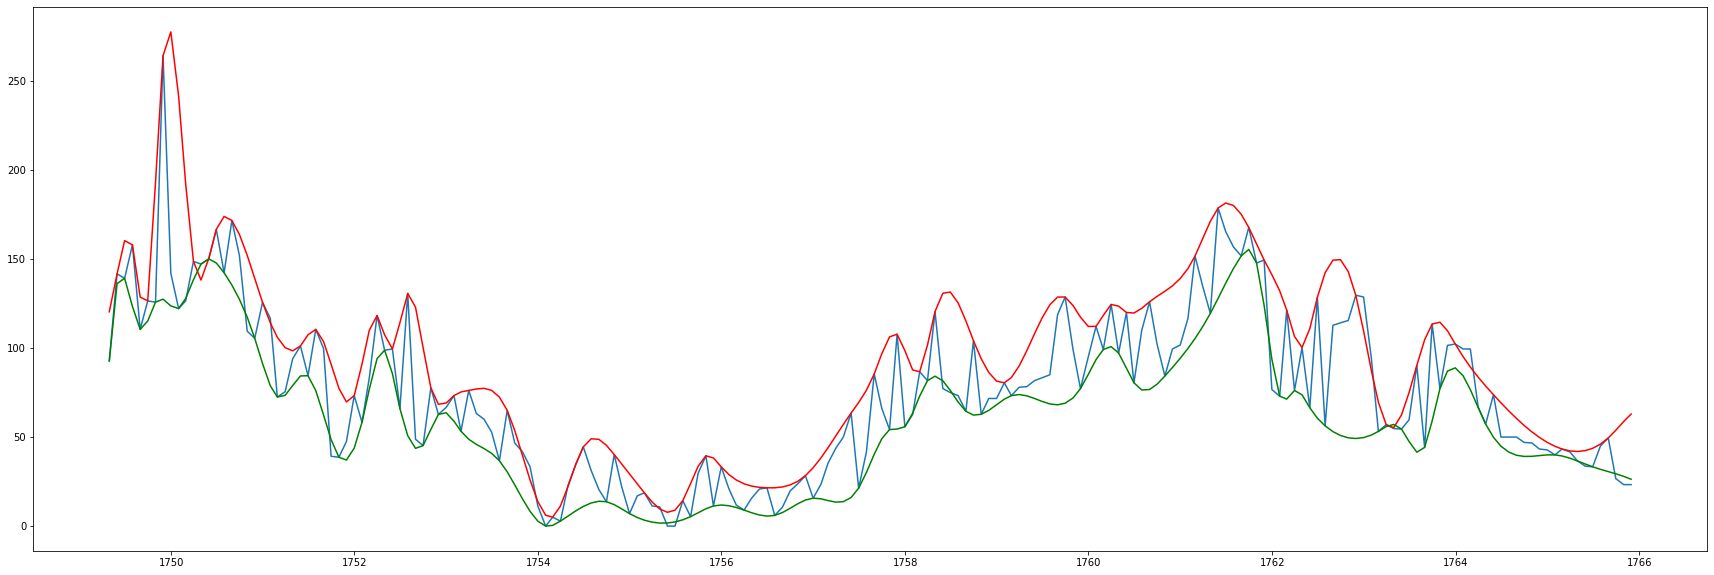

In [44]:
maxIndex = min(minsLocalSunspot[-1], maxsLocalSunspot[-1])
minIndex = max(minsLocalSunspot[0], maxsLocalSunspot[0])
maxIndex, minIndex
plt.figure(figsize=(30, 10))
plt.plot(dateSunspot[minIndex:maxIndex][:200], sunspotsSunspot[minIndex:maxIndex][:200])
plt.plot(dateSunspot[minIndex:maxIndex][:200], splineMaxSunspot(dateSunspot[minIndex:maxIndex][:200]), "r")
plt.plot(dateSunspot[minIndex:maxIndex][:200], splineMinSunspot(dateSunspot[minIndex:maxIndex][:200]), "g")

### Smoothing Functions  

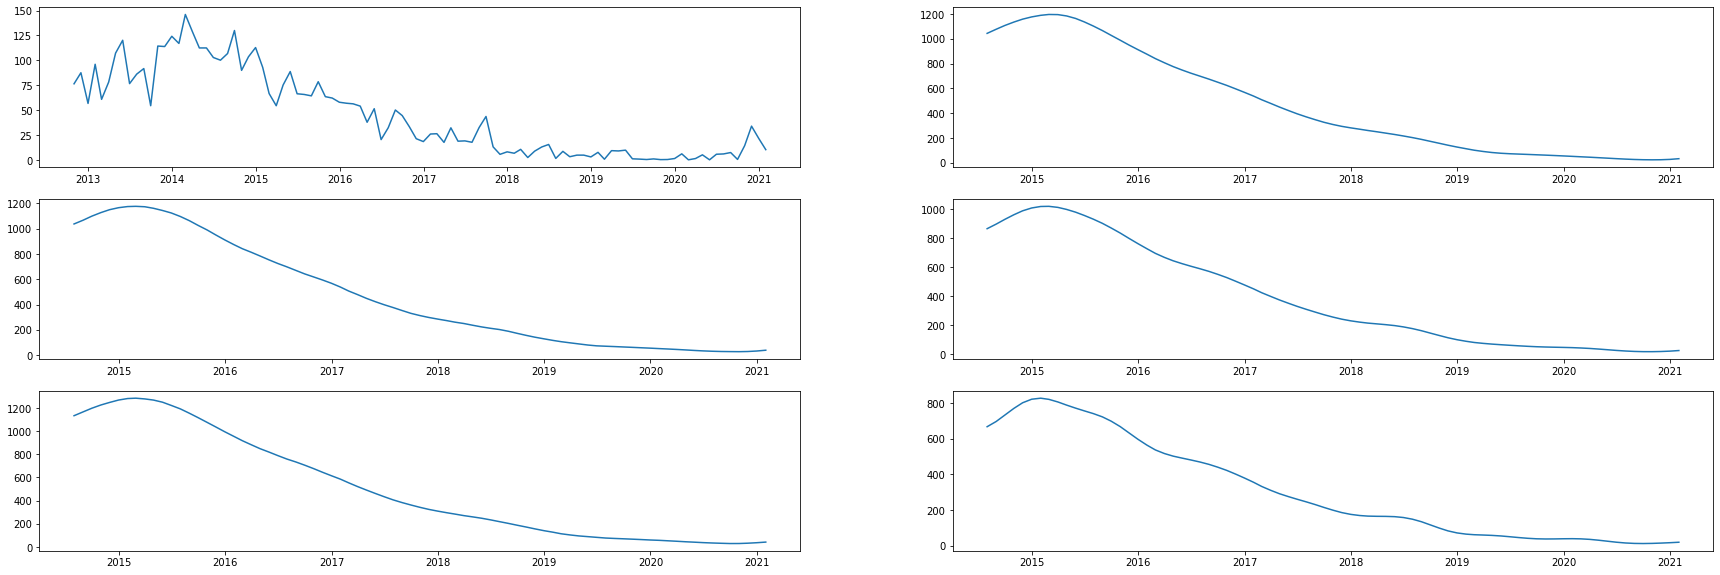

In [114]:
plt.figure(figsize=(30, 10))
curtialedSunspotsSunspots = sunspotsSunspot[-100:]
curtailedDateSunspots = dateSunspot[-100:]
smoothSunspotHanning = np.convolve(np.hanning(22), curtialedSunspotsSunspots, mode="valid")
plt.subplot(3, 2, 1)
plt.plot(curtailedDateSunspots, curtialedSunspotsSunspots)
plt.subplot(3, 2, 2)
plt.plot(curtailedDateSunspots[21:], smoothSunspotHanning)
smoothSunspotsBartlett = np.convolve(np.bartlett(22), curtialedSunspotsSunspots, mode="valid")
plt.subplot(3, 2, 3)
plt.plot(curtailedDateSunspots[21:], smoothSunspotsBartlett)
smoothSunspotsBlackman = np.convolve(np.blackman(22), curtialedSunspotsSunspots, mode="valid")
plt.subplot(3, 2, 4)
plt.plot(curtailedDateSunspots[21:], smoothSunspotsBlackman)
smoothSunspotsHamming = np.convolve(np.hamming(22), curtialedSunspotsSunspots, mode="valid")
plt.subplot(3, 2, 5)
plt.plot(curtailedDateSunspots[21:], smoothSunspotsHamming)
smoothSunspotsKaiser = np.convolve(np.kaiser(22, 14), curtialedSunspotsSunspots, mode="valid")
plt.subplot(3, 2, 6)
plt.plot(curtailedDateSunspots[21:], smoothSunspotsKaiser)
plt.show()

In [191]:
sunactivityData = sm.datasets.sunspots.load_pandas().data

In [192]:
sunactivityData.index = pd.to_datetime(sunactivityData.YEAR, format="%Y")

In [215]:
sunactivityData.iloc[:,1]

YEAR
1700-01-01     5.0
1701-01-01    11.0
1702-01-01    16.0
1703-01-01    23.0
1704-01-01    36.0
              ... 
2004-01-01    40.4
2005-01-01    29.8
2006-01-01    15.2
2007-01-01     7.5
2008-01-01     2.9
Name: SUNACTIVITY, Length: 309, dtype: float64

In [216]:
model = sm.tsa.ARMA(sunactivityData.iloc[:,1], (2,1)).fit()

/home/koshta/enviroments/learning/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'


In [233]:
datetime.date.today().year

2021

In [247]:
prediction = model.predict('2009', "2011", dynamic=True)

In [248]:
prediction


2009-01-01    14.604427
2010-01-01    33.437246
2011-01-01    52.297140
Freq: AS-JAN, dtype: float64